# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

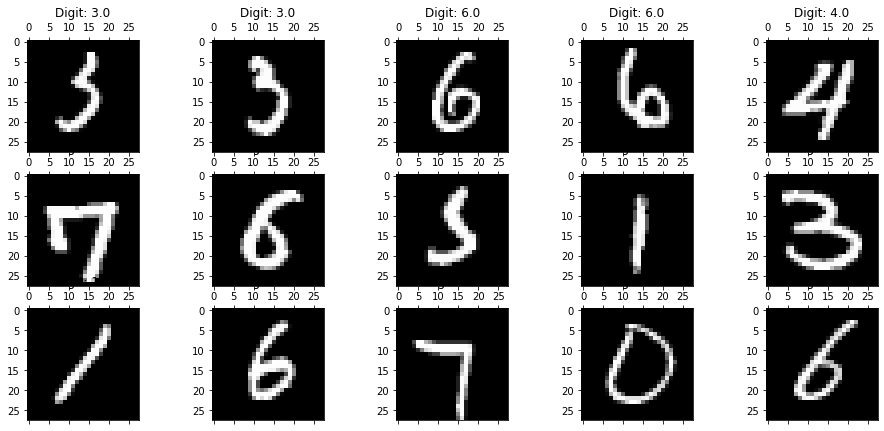

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)  

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_)     
X_train_pca = pca.fit_transform(X_train)

In [11]:
sum(pca.explained_variance_ratio_)

0.9999999999999993

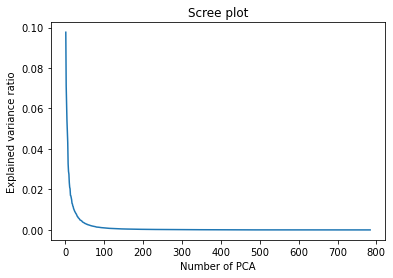

In [12]:
plt.title("Scree plot")
plt.plot(np.arange(1,X_train.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

In [17]:
from kneed import KneeLocator
kn = KneeLocator(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_, curve = 'convex', direction = 'decreasing')  
print(kn.knee)

57


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=57)     
X_train_pca = pca.fit_transform(X_train)
sum(pca.explained_variance_ratio_)

0.8457087389286793

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=47)     
X_train_pca = pca.fit_transform(X_train)
sum(pca.explained_variance_ratio_)

0.8153079472376079

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=67)     
X_train_pca = pca.fit_transform(X_train)
sum(pca.explained_variance_ratio_)

0.8687681371115993

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=87)     
X_train_pca = pca.fit_transform(X_train)
sum(pca.explained_variance_ratio_)

0.90018111003392

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
printcipalComponents = pca.fit_transform(X_train)

principalDf = pd.DataFrame(data=X_train)
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


분산의 95%를 보존해주는 개수 783 .. 

n_components는 57로 하자

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))

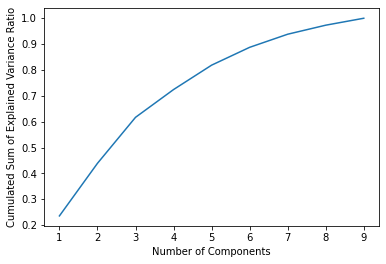

[0.23568854 0.43906754 0.61685094 0.72426465 0.8186057  0.88755476
 0.9382371  0.97314792 1.        ]


In [24]:
exp_var_ratio_cumsum = np.cumsum(lda.explained_variance_ratio_)     # 누적 설명 비중

# 주성분 개수에 대응하는 누적 설명 비중을 확인하는 것이 목적이므로, X축에는 index에 1을 더한 값을 배치('개수'를 뜻함)
plt.plot(list(range(1, 1+len(exp_var_ratio_cumsum))), exp_var_ratio_cumsum)
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Sum of Explained Variance Ratio")
plt.show()

print(exp_var_ratio_cumsum)

주성분 개수 최종 결정
LDA: pca도 분산의 84% 보존해주는 변수의 개수를 선택했기 때문에 5개를 사용하기로 했다
PCA: elbow point가 57일때 전체분산의 84% 보존해주기 때문에 57개를 사용하기로 했다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time   
from sklearn.metrics import accuracy_score   

from tqdm import tqdm  

In [32]:
lr_clf = LogisticRegression(random_state = 22) 
svc_clf = SVC(random_state = 22)    

In [34]:
start = time.time() 
lr_clf.fit(X_train, np.ravel(y_train))    
end = time.time()    
elapse_time = end - start   
    

print("Training 시간 :", elapse_time)
print("Accuracy :", accuracy_score(y_test, lr_clf.predict(X_test)))

Training 시간 : 14.106663942337036
Accuracy : 0.9211428571428572


C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
start = time.time()   
svc_clf.fit(X_train, np.ravel(y_train))   
end = time.time()   
elapse_time = end - start    
    

print("Training 시간 :", elapse_time)
print("Accuracy :", accuracy_score(y_test, svc_clf.predict(X_test)))

Training 시간 : 258.51344537734985
Accuracy : 0.9777142857142858


In [36]:
pca = PCA(n_components = 57)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)     # Test Data는 transform만!

In [37]:
start = time.time() 
lr_clf.fit(X_train_pca, np.ravel(y_train))    
end = time.time()    
elapse_time = end - start   
    

print("Training 시간 :", elapse_time)
print("Accuracy :", accuracy_score(y_test, lr_clf.predict(X_test_pca)))

Training 시간 : 7.302160024642944
Accuracy : 0.9067142857142857


C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
start = time.time() 
svc_clf.fit(X_train_pca, np.ravel(y_train))    
end = time.time()    
elapse_time = end - start   
    

print("Training 시간 :", elapse_time)
print("Accuracy :", accuracy_score(y_test, svc_clf.predict(X_test_pca)))

Training 시간 : 50.97428488731384
Accuracy : 0.9820714285714286


In [39]:
lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test)     

In [40]:
start = time.time() 
lr_clf.fit(X_train_lda, np.ravel(y_train))    
end = time.time()    
elapse_time = end - start   
    

print("Training 시간 :", elapse_time)
print("Accuracy :", accuracy_score(y_test, lr_clf.predict(X_test_lda)))

Training 시간 : 4.349652528762817
Accuracy : 0.8281428571428572


In [41]:
start = time.time() 
svc_clf.fit(X_train_lda, np.ravel(y_train))    
end = time.time()    
elapse_time = end - start   
    

print("Training 시간 :", elapse_time)
print("Accuracy :", accuracy_score(y_test, svc_clf.predict(X_test_lda)))

Training 시간 : 35.707581758499146
Accuracy : 0.8465714285714285


### PCA 진행후 svc 모델에 넣었을 때가 98%로 정확도가 제일 높게나왔다

특정한 틀 없이 자유롭게 해주시면 됩니다!